# **Predicting 2022 French presidential elections**


**Authors:** *Morvan Theo, Islamov Rustem, Popov Nicolai, Wasik Thomas, Bouley Alexis*


This challenge was done as a project for the Master 2 Data Science (2021/2022), DATACAMP course:
<br><br>


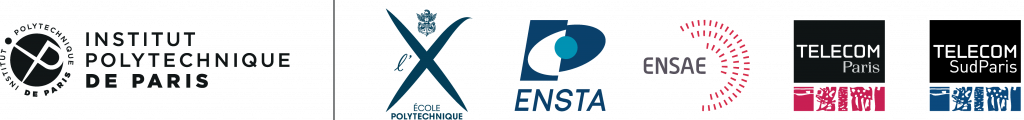

## Introduction

The French presidential elections are elections to elect the next president of the French republic. They take place every 5 years. 
It is quite common for candidates to run several times in a row. <br>
We are interested in a model to predict the percentage of votes that candidates will receive in relation to the number of registered voters. 
In this challenge we are interested in the three main candidates of the years 2017 and 2022: Melenchon, Macron and Le pen. <br>
We are also interested in the percentage of abstention, blank vote, and null vote as well as the total percentage of others candidates. <br>
From the scores achieved by each of these candidates in 2017 and social data, the objective is to predict the score of each of these candidates by city in 2022. <br>
<br>
In particular, in order to obtain a generalization for the following elections, it is preferable to use easily interpretable methods. For example, linear regressions where one can directly access the coefficients used by the model for each of the features.<br>



## Description of the Data

The data is composed of the percentages of votes received by each of the three major candidates in 2017. The dataset is also composed of the percentage of votes received by all the other candidates as well as the percentage of abstention, blank vote and null vote in 2017. <br>
<br>
A list of the features used is available here: https://www.insee.fr/fr/statistiques/6454652?sommaire=6454687#dictionnaire
<br>
<br>
These features are mainly composed of data related to the employment status of individuals as well as their ages and income.


### Output Data


The output data should be a ndarray of shape (batch_size, 7) with the following columns to predict:

- % Absence / registered
- % Null Vote / registered
- % Blank Vote / registered
- % Others Candidates Vote / registered
- % MACRON Vote / registered
- % MELENCHON Vote / registered
- % LE PEN Vote / registered

## Evaluation Metric

We aim to predict the percentage of vote by category. This is a regression problem, we therefore use the root mean square error here:


$$RMSE =\sqrt{\frac{1}{n \times p} \sum_{i=1}^n \sum_{j=1}^p (y_{i, j} - \hat{y}_{i, j})^2}.$$

Another metric that we use to evaluate the predictions is 

$$MAE =\frac{1}{n \times p} \sum_{i=1}^n \sum_{j=1}^p  |y_{i, j} - \hat{y}_{i, j}|.$$

The final evaluation is done according to the mixed score which is an average of RMSE and MAE.

## Download Data

You can download the data with the command:

In [406]:
! python download_data.py

The data is downloading from the various sources and then aggregated to match our objectives. The downloaded datasets are initially rather big, so make sure that you have a robust internet connection or it might take some time. <br>We kindly refer a user to find more detailed information in the README file about the data in the case of any difficulties with the downloading

## Reading the data

First, we need to import modules and implemented functions

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from problem import _target_column_name, _ignore_column_names
from problem import get_train_data, get_test_data

Now we want to show explicitely the preprocessing step as it is the key to success with the project. The description below explains and shows how we join original data with external ones. To show this, we use `get_train_data` function which returns only the original dataset (a full and proper pipeline can be found in the estimator file and later).

In [140]:
X_train, y_train = get_train_data()
X_test, y_test = get_test_data()

y_train = pd.DataFrame(y_train, columns=_target_column_name)
y_test = pd.DataFrame(y_test, columns=_target_column_name)

In [141]:
y_train

% Abs/Ins_2022  % Nuls/Ins_2022  % Blancs/Ins_2022  % Autres/Ins_2022  \
0           23.245930         0.503850           0.846830          21.369874   
1           22.010000         0.960000           0.480000          16.750000   
2           18.580000         0.220000           1.550000          20.790000   
3           12.160000         0.000000           0.000000          33.790000   
4           19.250000         0.840000           1.260000          28.449999   
...               ...              ...                ...                ...   
27844       11.520000         0.370000           3.720000          23.040000   
27845       19.740000         0.000000           2.190000          19.310000   
27846       19.095058         0.112963           1.041910          22.339954   
27847       16.040001         0.370000           2.240000          21.650000   
27848       20.273247         0.390489           1.404506          24.670211   

       % Voix/Ins_MACRON_2022  % Voix/Ins_MELENCHON_2022  \
0                   28.379133                  10.628410   
1                   18.660000                  17.700001   
2                   18.809999                  15.040000   
3                   27.030001                   8.110000   
4                   15.900000                  14.230000   
...                       ...                        ...   
27844               23.420000                   8.920000   
27845               24.120001                   7.460000   
27846               19.211296                  11.921597   
27847               19.400000                  17.540001   
27848               20.751078                  15.353393   

       % Voix/Ins_LEPEN_2022  
0                  15.025973  
1                  23.440001  
2                  25.000000  
3                  18.920000  
4                  20.080000  
...                      ...  
27844              29.000000  
27845              27.190001  
27846              26.274560  
27847              22.760000  
27848              17.161993  

[27849 rows x 7 columns]

## Data Analysis

We will first perform some analysis regarding the baseline features in our dataset. <br>

In [142]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27849 entries, 0 to 27848
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CODGEO                     27849 non-null  object 
 1   % Abs/Ins_2017             27849 non-null  float64
 2   % Vot/Ins_2017             27849 non-null  float64
 3   % Nuls/Ins_2017            27849 non-null  float64
 4   % Blancs/Ins_2017          27849 non-null  float64
 5   %_Exp/Ins_2017             27849 non-null  float64
 6   % Autres/Ins_2017          27849 non-null  float64
 7   % Voix/Ins_MACRON_2017     27849 non-null  float64
 8   % Voix/Ins_MELENCHON_2017  27849 non-null  float64
 9   % Voix/Ins_LEPEN_2017      27849 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.1+ MB


One can notice that there is no missing values in our data, which is a great thing. However, we do not have the location. We are going to load the required data and start make some visualizations

In [143]:
from problem import get_location_data
data_location = get_location_data()

In [144]:
X_train= X_train.merge(data_location, on='CODGEO', how='left')

In [145]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27849 entries, 0 to 27848
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CODGEO                     27849 non-null  object 
 1   % Abs/Ins_2017             27849 non-null  float64
 2   % Vot/Ins_2017             27849 non-null  float64
 3   % Nuls/Ins_2017            27849 non-null  float64
 4   % Blancs/Ins_2017          27849 non-null  float64
 5   %_Exp/Ins_2017             27849 non-null  float64
 6   % Autres/Ins_2017          27849 non-null  float64
 7   % Voix/Ins_MACRON_2017     27849 non-null  float64
 8   % Voix/Ins_MELENCHON_2017  27849 non-null  float64
 9   % Voix/Ins_LEPEN_2017      27849 non-null  float64
 10  latitude                   27843 non-null  float64
 11  longitude                  27843 non-null  float64
 12  Superficie                 27843 non-null  float64
dtypes: float64(12), object(1)
memory usage: 3.0+ M

We have some missing values. Let's check them to see how big this cities are

In [146]:
X_train[X_train['latitude'].isnull()]['CODGEO'].apply(lambda element : element[:2]).unique()


array(['76', '69', '55', '13', '75'], dtype=object)

One can we see a 75, related to Paris. Indeed, in our data, we have values for the total city, whereas in the external dataset it is at an "arrondissement" level. We are going to fix this

In [147]:
paris_boroughs = [] 
for i in range(1,21):
    if i<10:
        paris_boroughs.append(f"7510{i}")
    else:
        paris_boroughs.append(f"751{i}")
paris_data = data_location[data_location['CODGEO'].isin(paris_boroughs)]
X_train.loc[X_train['CODGEO'].str.contains('75056'),['latitude', 'longitude', 'Superficie'] ] = paris_data.agg({'latitude':np.mean,'longitude':np.mean, "Superficie":np.sum}).values

The modification performed here can been found in a proper manner both in the problem file but also in the estimator

We have fixed it for Paris, but this issue might appears for other french cities. Competitors are welcomed to look online and check for other potential similar issues in cities such as Lyon and Marseille (potentially in dataset?)

Regarding the other cities, we will just take the mean per department (two first values of CODGEO)

In [148]:
def missing_values_department(X, data_location):
    X = X.copy()
    X["Departement"] = X["CODGEO"].apply(lambda element: element[:2])
    data_location["Departement"] = data_location["CODGEO"].apply(lambda element: element[:2])
    data_group = data_location.groupby("Departement")[["latitude", "longitude", "Superficie"]].mean()
    for column in data_group.columns:
        globals()[f"dict_{column}"] = data_group[column].to_dict()
        X.loc[X[column].isnull(), "Departement"].map(
            globals()[f"dict_{column}"]
        ).value_counts()
        X[column].fillna((X[column].mean()), inplace=True)
    X = X.drop(columns=["Departement"])
    return X

In [149]:
X_train = missing_values_department(X_train,data_location)

In [150]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27849 entries, 0 to 27848
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CODGEO                     27849 non-null  object 
 1   % Abs/Ins_2017             27849 non-null  float64
 2   % Vot/Ins_2017             27849 non-null  float64
 3   % Nuls/Ins_2017            27849 non-null  float64
 4   % Blancs/Ins_2017          27849 non-null  float64
 5   %_Exp/Ins_2017             27849 non-null  float64
 6   % Autres/Ins_2017          27849 non-null  float64
 7   % Voix/Ins_MACRON_2017     27849 non-null  float64
 8   % Voix/Ins_MELENCHON_2017  27849 non-null  float64
 9   % Voix/Ins_LEPEN_2017      27849 non-null  float64
 10  latitude                   27849 non-null  float64
 11  longitude                  27849 non-null  float64
 12  Superficie                 27849 non-null  float64
dtypes: float64(12), object(1)
memory usage: 3.0+ M

Now let's perform some visualization

<AxesSubplot:xlabel='value', ylabel='Count'>

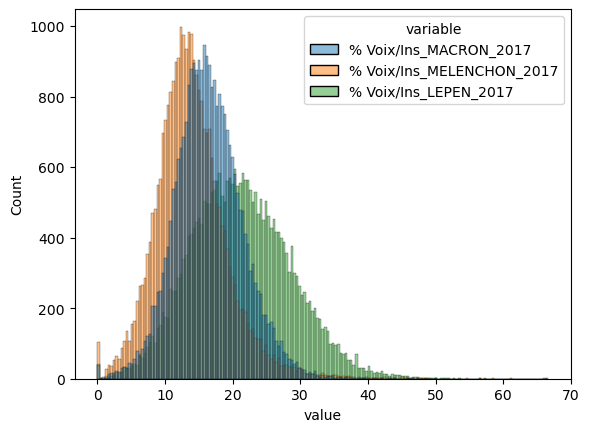

In [151]:
variables = ["% Voix/Ins_MACRON_2017", "% Voix/Ins_MELENCHON_2017","% Voix/Ins_LEPEN_2017"]
df_plot = X_train[["CODGEO","% Voix/Ins_MACRON_2017", "% Voix/Ins_MELENCHON_2017","% Voix/Ins_LEPEN_2017"]].melt(id_vars='CODGEO')
sns.histplot(data=df_plot, x="value",hue="variable")

It seems that Mme Le Pen got very high score in some communes, whereas M. Melenchon and M. Macron might have got more balanced scores. Mme Le Pen most likely overperformed in small cities, whereas the two big candidates got higher scores in bigger cities

<AxesSubplot:xlabel='value', ylabel='Count'>

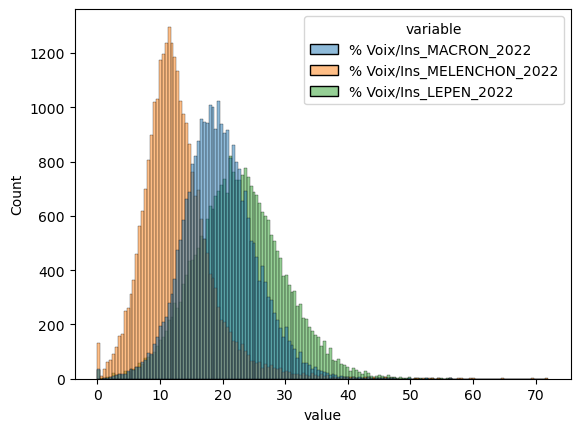

In [152]:
df_plot = y_train.copy()
df_plot['CODGEO'] = X_train['CODGEO']
variables = ["% Voix/Ins_MACRON_2022", "% Voix/Ins_MELENCHON_2022","% Voix/Ins_LEPEN_2022"]
df_plot = df_plot[["CODGEO","% Voix/Ins_MACRON_2022", "% Voix/Ins_MELENCHON_2022","% Voix/Ins_LEPEN_2022"]].melt(id_vars='CODGEO')
sns.histplot(data=df_plot, x="value",hue="variable")

We can notice one thing : M. Macron slightly increased its performances compared to 2017, while they remained rather comparable for the two other main candidates

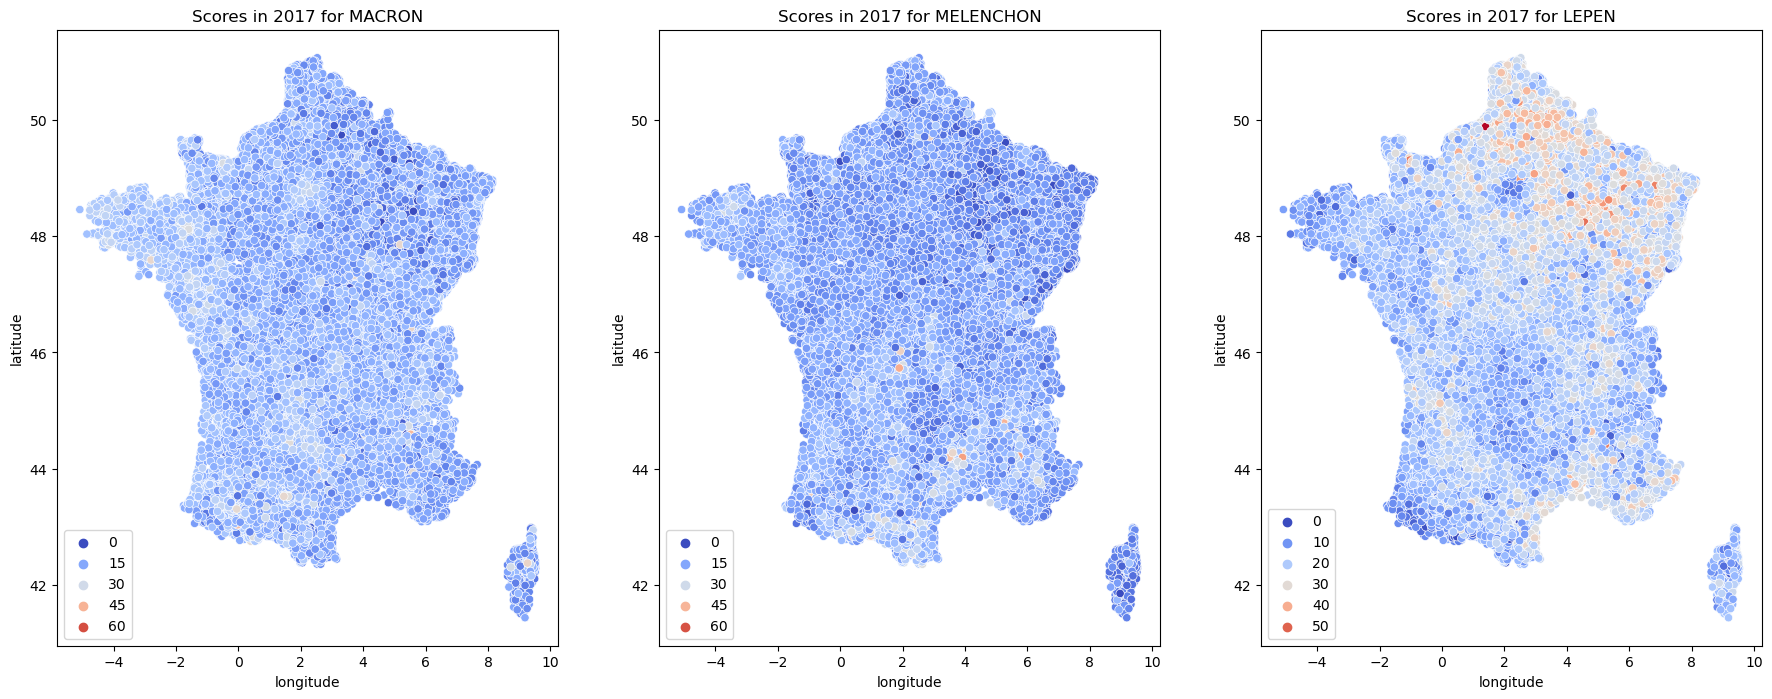

In [153]:
fig, axes = plt.subplots(1,3, figsize=(22, 8))
main_candidates = ['MACRON', "MELENCHON","LEPEN"]
for i, candidate in enumerate(main_candidates):
    sns.scatterplot(
        data=X_train, 
        x="longitude",
        y="latitude",
        hue=f'% Voix/Ins_{candidate}_2017',
        palette='coolwarm',
        ax=axes[i],
    )
    axes[i].set_title(f'Scores in 2017 for {candidate}')
    axes[i].legend(loc=3)

The plots for M. Macron & M. Melenchon might not be as illustrative as the one for M. Le Pen, due to some very high values. Let's filter them to have clearer graphs.

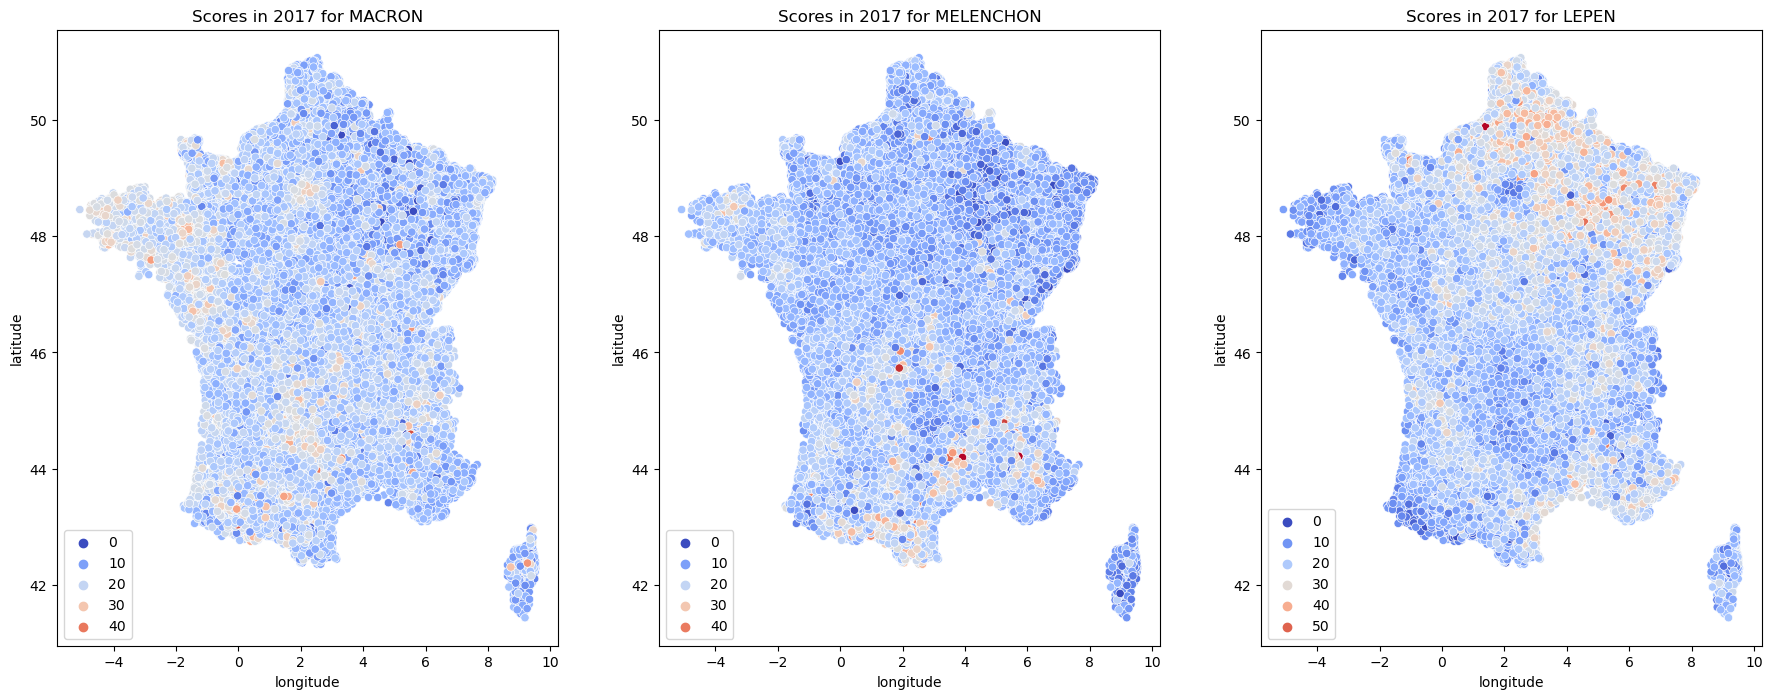

In [154]:
fig, axes = plt.subplots(1,3, figsize=(22, 8))
main_candidates = ['MACRON', "MELENCHON","LEPEN"]
for i, candidate in enumerate(main_candidates):
    X_plot = X_train.copy()
    if candidate !="LEPEN":
        X_plot = X_plot[X_plot[f'% Voix/Ins_{candidate}_2017']<50]
    sns.scatterplot(
        data=X_plot, 
        x="longitude",
        y="latitude",
        hue=f'% Voix/Ins_{candidate}_2017',
        palette='coolwarm',
        ax=axes[i],
    )
    axes[i].set_title(f'Scores in 2017 for {candidate}')
    axes[i].legend(loc=3)

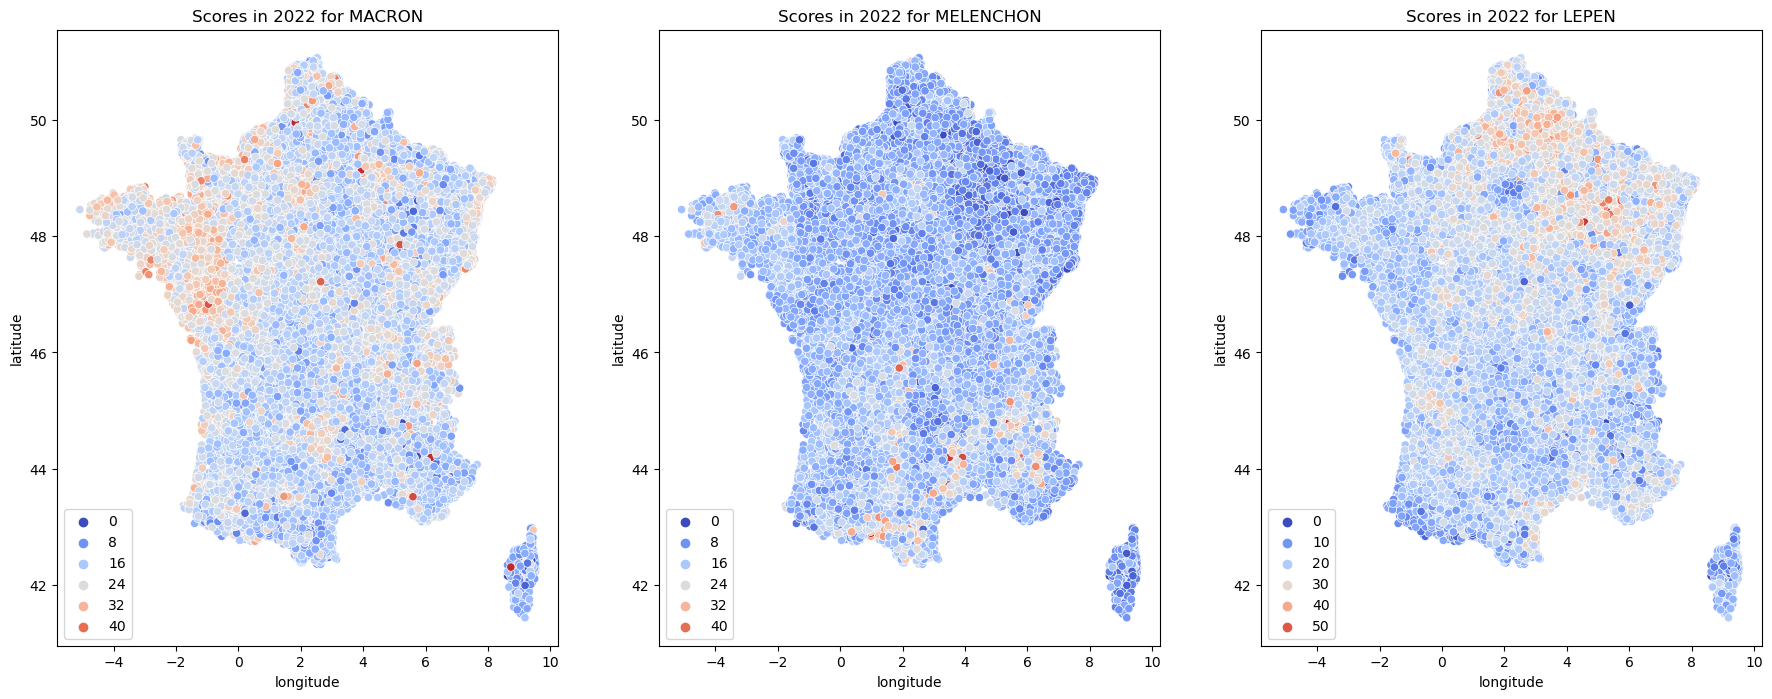

In [155]:
fig, axes = plt.subplots(1,3, figsize=(22, 8))
main_candidates = ['MACRON', "MELENCHON","LEPEN"]
for i, candidate in enumerate(main_candidates):
    X_plot = y_train.copy()
    X_plot['latitude'] = X_train['latitude']
    X_plot['longitude'] = X_train['longitude']
    if candidate !="LEPEN":
        X_plot = X_plot[X_plot[f'% Voix/Ins_{candidate}_2022']<50]
    sns.scatterplot(
        data=X_plot, 
        x="longitude",
        y="latitude",
        hue=f'% Voix/Ins_{candidate}_2022',
        palette='coolwarm',
        ax=axes[i],
    )
    axes[i].set_title(f'Scores in 2022 for {candidate}')
    axes[i].legend(loc=3)

It is very interesting to see that M. Macron strongly increased its performances in Brittany and "Haute-Savoie", let's check it properly.

Let's compare the scores between the two elections (2017 and 2022)

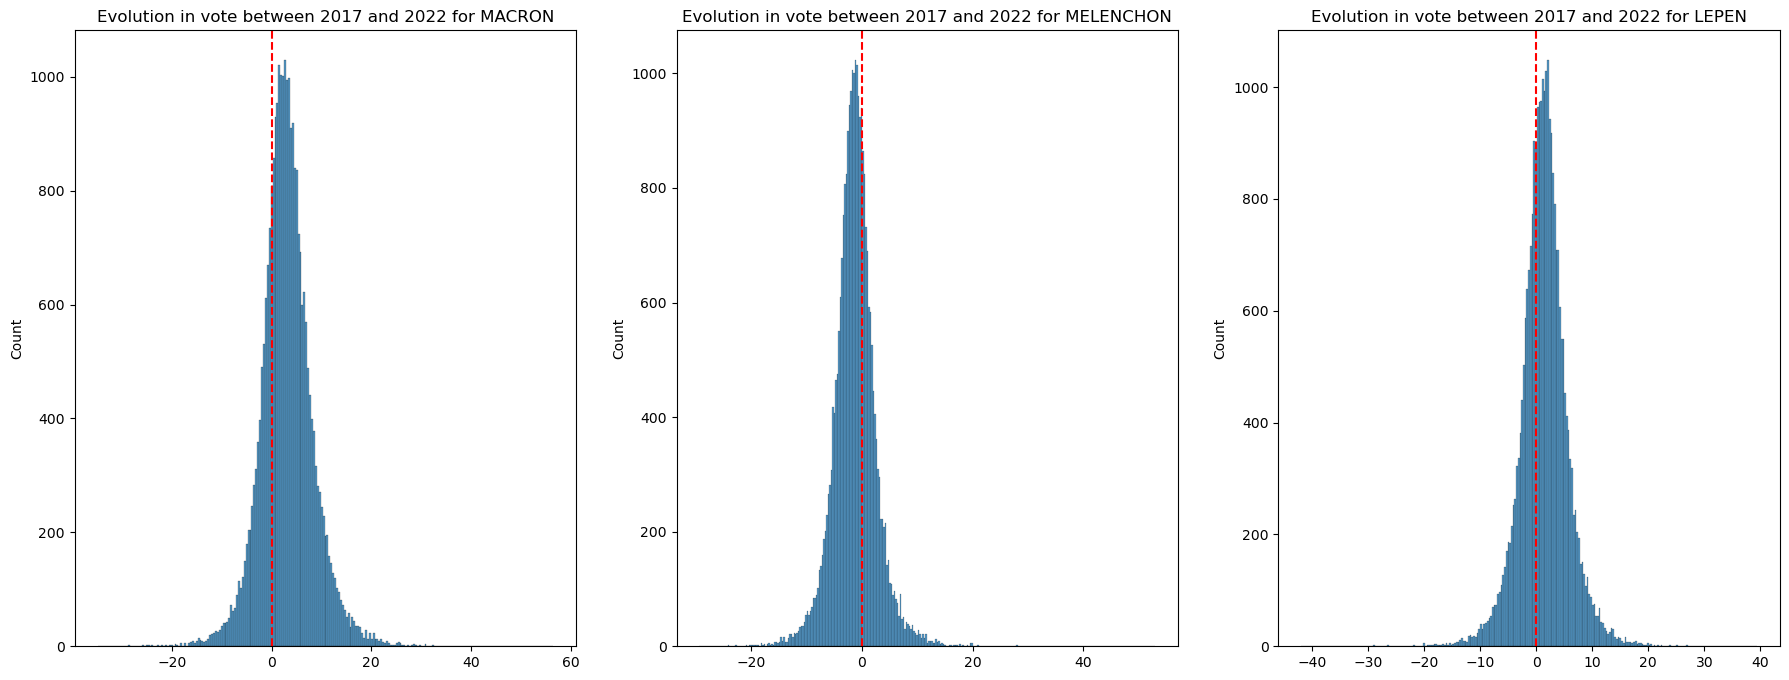

In [156]:
fig, axes = plt.subplots(1,3, figsize=(22, 8))
main_candidates = ['MACRON', "MELENCHON","LEPEN"]
for i, candidate in enumerate(main_candidates):
    plot_2017 = y_train[f'% Voix/Ins_{candidate}_2022'].copy()
    plot_2022 = X_train[f'% Voix/Ins_{candidate}_2017']
    sns.histplot(plot_2017 - plot_2022,ax=axes[i])
    axes[i].set_title(f'Evolution in vote between 2017 and 2022 for {candidate}')
    axes[i].axvline(0, linestyle="--", color='red')

These plots are very interesting for several reasons : 
1. Both M. Macron & Mme. Le Pen proportionally increased their relative scores in different cities
2. There was no major difference for M. Melenchon : while he got slighly lower relatives scores in the majority of cities, he still increased his score at a national level. This was most likely caused by big cities voting a bit more for him.

Let's have a quick look at the Absentation, other candidates and null votes evolutions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


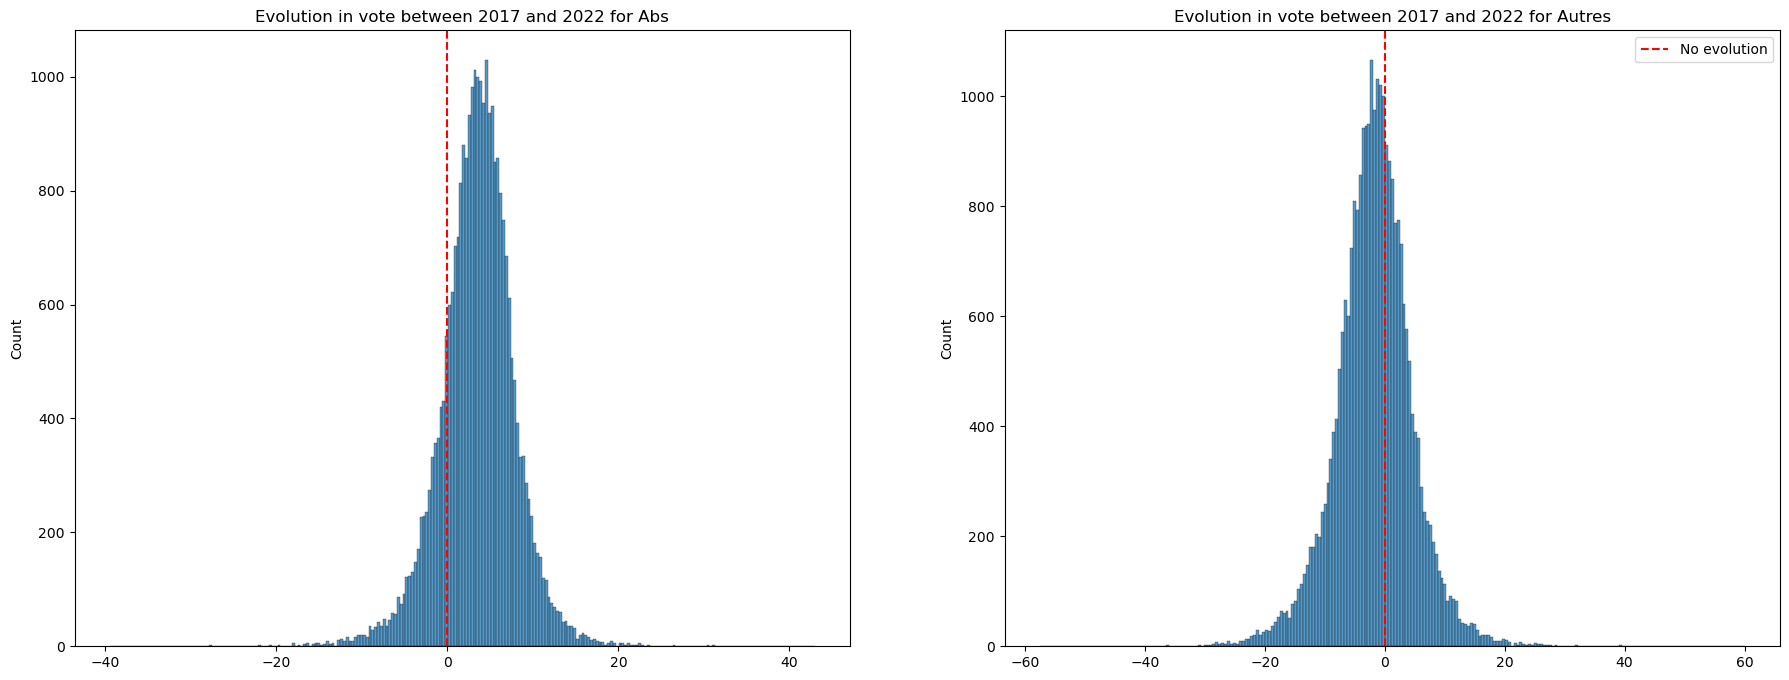

In [161]:
other_candidates = ['Abs',"Autres"]
fig, axes = plt.subplots(1,len(other_candidates), figsize=(22, 8))

for i, candidate in enumerate(other_candidates):
    sns.histplot(y_train[f'% {candidate}/Ins_2022'] - X_train[f'% {candidate}/Ins_2017'],ax=axes[i])
    axes[i].set_title(f'Evolution in vote between 2017 and 2022 for {candidate}')
    axes[i].axvline(0,color='red', linestyle='--', label="No evolution")
    plt.legend()

One can notice two elements : 
1. An increasing abstention
2. A polarization of the votes around the main candidates with the reinforcement of the logic of the useful vote

We can also look at the external data that we have downloaded. It is composed of two different INSEE databases, one on the job market for each "commune", and the second one regarding the revenues in the different job mark

In [162]:
from problem import get_external_data
import os

df_external_features = get_external_data()

In [163]:
df_external_features.head()

CODGEO  NBMEN19  NBPERS19   NBUC19   Q219  PPMINI19     D919   GI19  PPEN19  \
0  01001      322       819    542.7  23970       NaN      NaN    NaN     NaN   
1  01002      113       263    177.2  23640       NaN      NaN    NaN     NaN   
2  01004     6711     15040  10296.8  20510       3.1  35230.0  0.290    25.6   
3  01005      720      1823   1204.3  24050       NaN      NaN    NaN     NaN   
4  01007     1160      2853   1888.8  23380       1.6  36840.0  0.206    26.0   

   P19_POP1564  ...  C08_AGRILT_NSAL  C08_INDUSLT_NSAL  C08_CONSTLT_NSAL  \
0   469.844357  ...        15.605425          0.000000          3.901356   
1   151.709933  ...        11.919192          0.000000          3.919192   
2  9019.238731  ...         7.966664         35.733379         55.954336   
3  1121.150954  ...         0.000000         11.878713         15.848467   
4  1721.000000  ...        24.529472          3.945017         15.780069   

   C08_CTSLT_NSAL  C08_APESASLT_NSAL  C08_AGRILT_FNSAL  C08_INDUSLT_FNSAL  \
0        3.901356           3.901356          7.802713                0.0   
1        0.000000           0.000000          4.000000                0.0   
2      268.499875          88.871511          0.000000                0.0   
3       35.029703           4.160839          0.000000                4.0   
4       55.081641          18.295703          0.000000                0.0   

   C08_CONSTLT_FNSAL  C08_CTSLT_FNSAL  C08_APESASLT_FNSAL  
0           0.000000         0.000000            3.901356  
1           0.000000         0.000000            0.000000  
2           3.774155       101.677648           56.305222  
3           0.000000        15.636139            4.160839  
4           0.000000         7.890034           15.288489  

[5 rows x 362 columns]

In [164]:
df_external_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31344 entries, 0 to 31343
Columns: 362 entries, CODGEO to C08_APESASLT_FNSAL
dtypes: float64(358), int64(3), object(1)
memory usage: 86.6+ MB


It is a huge dataset containing hundreds of indicators regarding each CODGEO. We are going to present just a few, but competitors are welcomed to dive deep into it and explore it while adding different features.
We will focus on the following features :
1. NBPERS19	: number of persons living in this city in 2019
2. P19_POP1564 : number of persons aged between 15 to 64
3. P19_CHOMEUR1564: Number of Unemployed persons living in the city
4. Q219 : Median Yearly Available Income per person in a given city
5. PPMINI19 : Part of revenues coming from minimal state benefits (such as RSA)
6. GIN19 : Gini index in a given city

In [165]:
interesting_external_columns = ["NBPERS19","P19_POP1564","P19_CHOMEUR1564","Q219","PPMINI19","GI19"]
df_external_analysis = df_external_features[["CODGEO"]+interesting_external_columns]
df_external_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31344 entries, 0 to 31343
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CODGEO           31344 non-null  object 
 1   NBPERS19         31344 non-null  int64  
 2   P19_POP1564      31344 non-null  float64
 3   P19_CHOMEUR1564  31344 non-null  float64
 4   Q219             31344 non-null  int64  
 5   PPMINI19         5335 non-null   float64
 6   GI19             5335 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.7+ MB


In [166]:
X_train = X_train.merge(df_external_analysis, on='CODGEO',how='left')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27849 entries, 0 to 27848
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CODGEO                     27849 non-null  object 
 1   % Abs/Ins_2017             27849 non-null  float64
 2   % Vot/Ins_2017             27849 non-null  float64
 3   % Nuls/Ins_2017            27849 non-null  float64
 4   % Blancs/Ins_2017          27849 non-null  float64
 5   %_Exp/Ins_2017             27849 non-null  float64
 6   % Autres/Ins_2017          27849 non-null  float64
 7   % Voix/Ins_MACRON_2017     27849 non-null  float64
 8   % Voix/Ins_MELENCHON_2017  27849 non-null  float64
 9   % Voix/Ins_LEPEN_2017      27849 non-null  float64
 10  latitude                   27849 non-null  float64
 11  longitude                  27849 non-null  float64
 12  Superficie                 27849 non-null  float64
 13  NBPERS19                   25028 non-null  flo

As one can notice, we have many missing values for some features (all those coming from the INSEE income dataset). One can rely on two different options : 
1. Discard these features
2. Compute mean values as granular as possible using the latitude and longitude values
3. Just compute the department mean. We opt for this third option for quick results, but competitors are welcomed to try any other approach.

In [167]:
df_external_analysis.loc[:,'Departement'] = df_external_analysis.loc[:,'CODGEO'].apply(lambda element : element[:2])
X_train.loc[:,'Departement'] = X_train.loc[:,'CODGEO'].apply(lambda element : element[:2])
missing_columns = (X_train.isnull().sum()>0)[(X_train.isnull().sum()>0)].index
for feature in missing_columns:
    globals()[f"dict_{feature}"] = df_external_analysis.groupby('Departement')[feature].mean().to_dict()
    X_train.loc[X_train[feature].isnull(), feature] = X_train.loc[X_train[feature].isnull(), "Departement"].map(globals()[f"dict_{feature}"])
X_train = X_train.drop(columns=["Departement"])

C:\Users\32mor\AppData\Local\Temp\ipykernel_22432\3841013555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_external_analysis.loc[:,'Departement'] = df_external_analysis.loc[:,'CODGEO'].apply(lambda element : element[:2])


In [168]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27849 entries, 0 to 27848
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CODGEO                     27849 non-null  object 
 1   % Abs/Ins_2017             27849 non-null  float64
 2   % Vot/Ins_2017             27849 non-null  float64
 3   % Nuls/Ins_2017            27849 non-null  float64
 4   % Blancs/Ins_2017          27849 non-null  float64
 5   %_Exp/Ins_2017             27849 non-null  float64
 6   % Autres/Ins_2017          27849 non-null  float64
 7   % Voix/Ins_MACRON_2017     27849 non-null  float64
 8   % Voix/Ins_MELENCHON_2017  27849 non-null  float64
 9   % Voix/Ins_LEPEN_2017      27849 non-null  float64
 10  latitude                   27849 non-null  float64
 11  longitude                  27849 non-null  float64
 12  Superficie                 27849 non-null  float64
 13  NBPERS19                   27849 non-null  flo

No more missing values, we now make some visualization

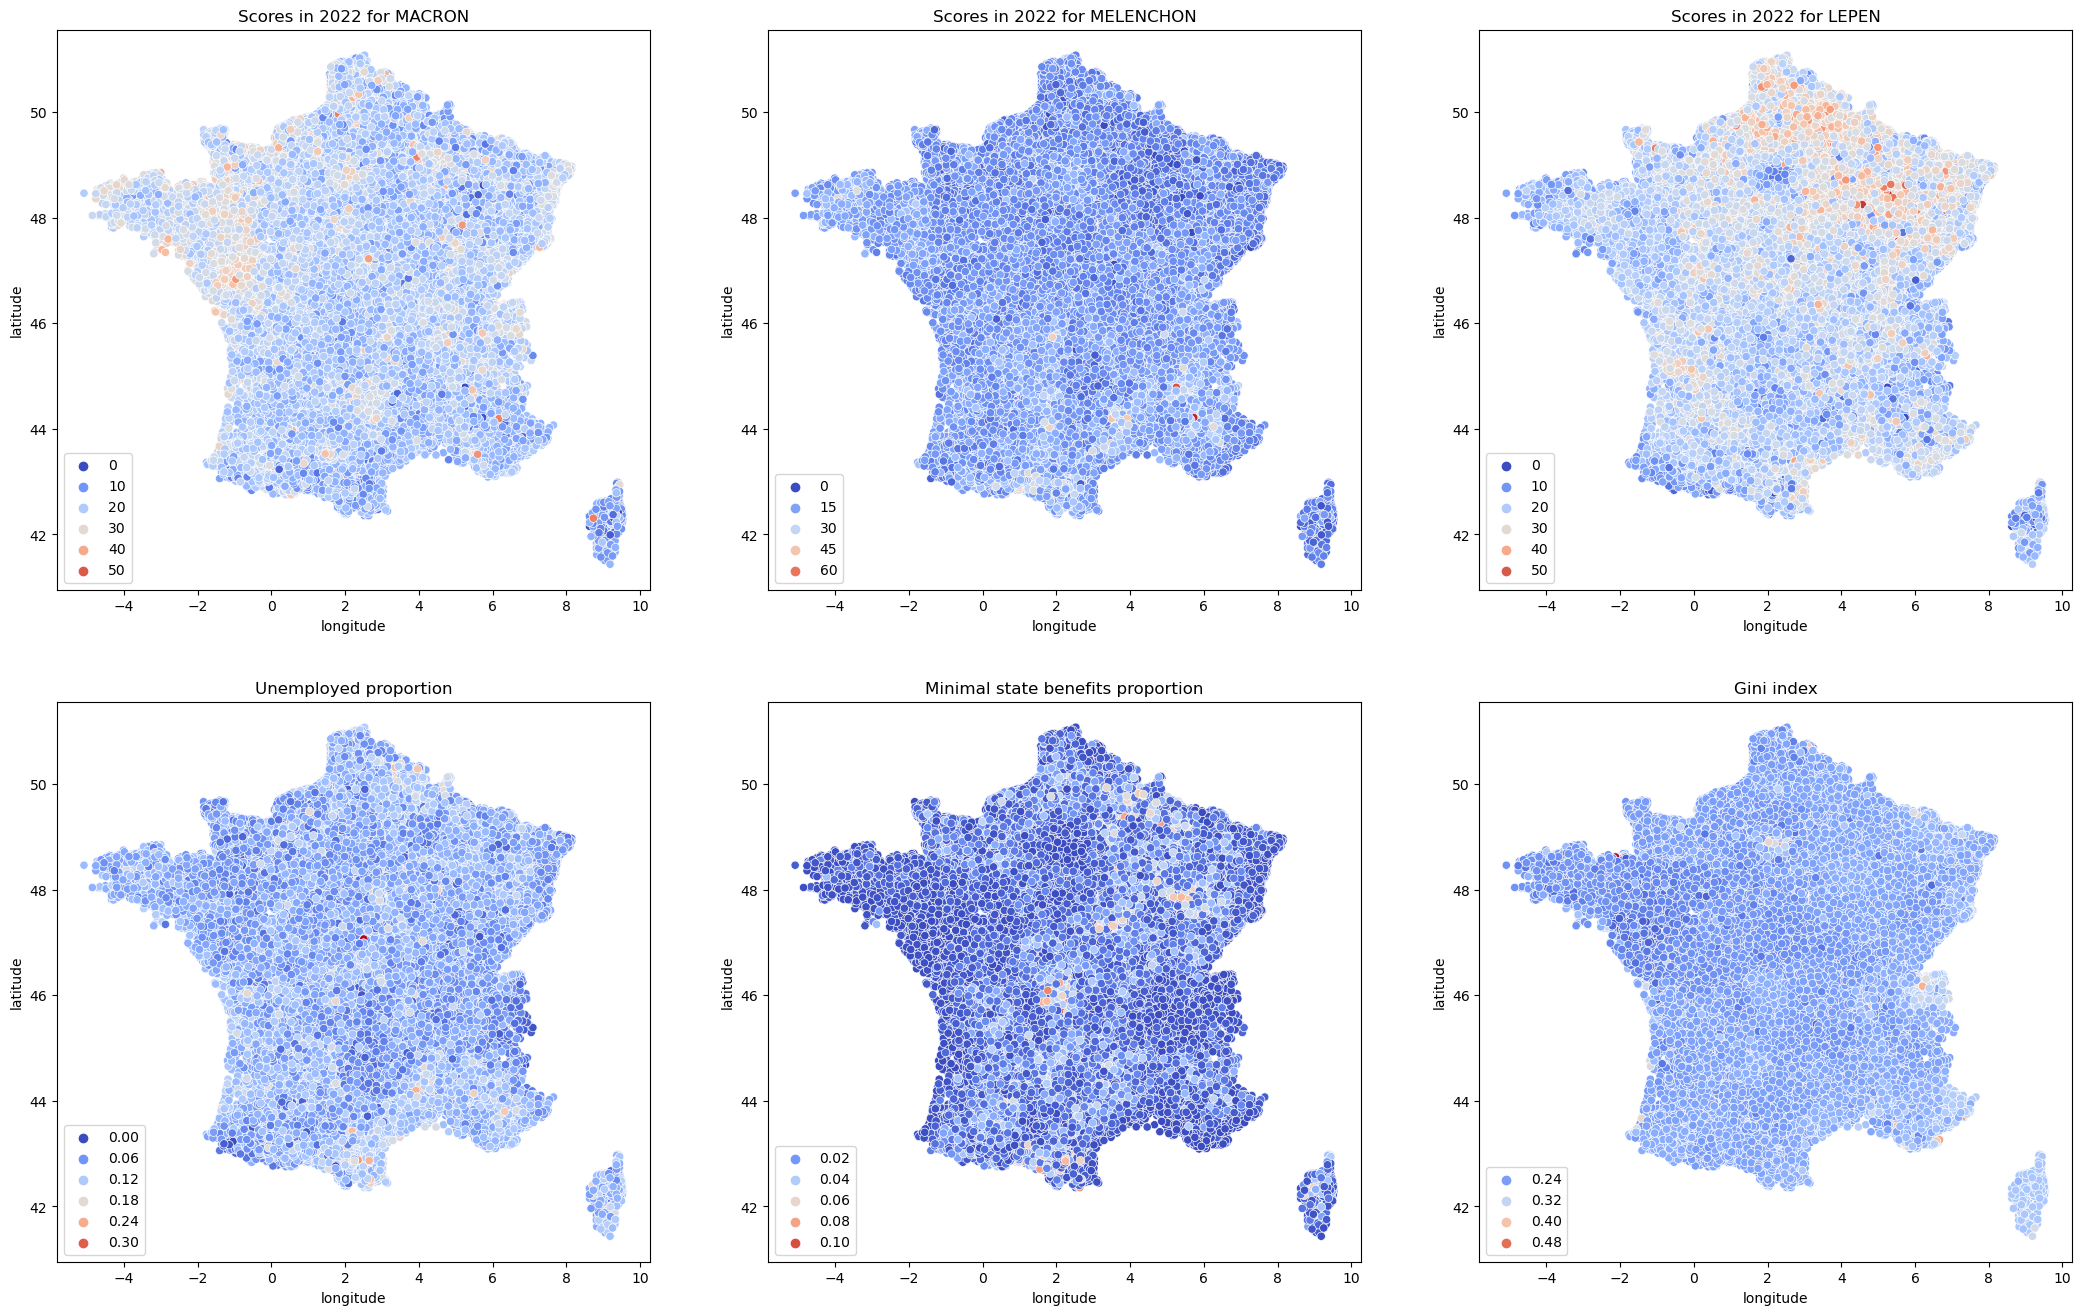

In [169]:
df_poverty = y_train.copy()
df_poverty["latitude"] = X_train["latitude"]
df_poverty["longitude"] = X_train["longitude"]
df_poverty['Unemployed_proportion'] = X_train['P19_CHOMEUR1564']/X_train['P19_POP1564']
df_poverty['Minimal_state_benefits_proportion'] = X_train['PPMINI19']/X_train['P19_POP1564']
df_poverty["GI19"] = X_train["GI19"]

fig, axes = plt.subplots(2, 3, figsize=(26, 16))
axes = axes.flatten()
main_candidates = ['MACRON', "MELENCHON","LEPEN"]
for i, candidate in enumerate(main_candidates):
    sns.scatterplot(
        data=df_poverty, 
        x="longitude",
        y="latitude",
        hue=f'% Voix/Ins_{candidate}_2022',
        palette='coolwarm',
        ax=axes[i],
    )
    axes[i].set_title(f'Scores in 2022 for {candidate}')
    axes[i].legend(loc=3)


axes[3].set_title('Unemployed proportion')
sns.scatterplot(data=df_poverty, x="longitude",y="latitude",hue="Unemployed_proportion",palette='coolwarm', ax=axes[3])
axes[3].legend(loc=3)

axes[4].set_title('Minimal state benefits proportion')
sns.scatterplot(data=df_poverty, x="longitude",y="latitude",hue="Minimal_state_benefits_proportion",palette='coolwarm', ax=axes[4])
axes[4].legend(loc=3)

axes[5].set_title('Gini index')
sns.scatterplot(data=df_poverty, x="longitude",y="latitude",hue="GI19",palette='coolwarm', ax=axes[5])
axes[5].legend(loc=3)

We have represented above a map of: 

- the unemployed proportion of active population
- the proportion of people living thanks to minimal state benefits
- the Gini index

All thes features are relevent to see the poverty of cities.

because the graphs are difficult to use, it can be useful to plot the covariance matrix in order to quickly see the impact of these indexes on voting results in 2022.

% Abs/Ins_2022  % Nuls/Ins_2022  \
% Abs/Ins_2022                           1.000000        -0.004645   
% Nuls/Ins_2022                         -0.004645         1.000000   
% Blancs/Ins_2022                       -0.098502        -0.037371   
% Autres/Ins_2022                       -0.393067        -0.073927   
% Voix/Ins_MACRON_2022                  -0.310549        -0.082597   
% Voix/Ins_MELENCHON_2022               -0.165560        -0.063440   
% Voix/Ins_LEPEN_2022                   -0.043454        -0.056103   
Unemployed_proportion                    0.244894         0.009004   
Minimal_state_benefits_proportion       -0.106724         0.028083   
GI19                                     0.098644        -0.020631   

                                   % Blancs/Ins_2022  % Autres/Ins_2022  \
% Abs/Ins_2022                             -0.098502          -0.393067   
% Nuls/Ins_2022                            -0.037371          -0.073927   
% Blancs/Ins_2022                           1.000000           0.013347   
% Autres/Ins_2022                           0.013347           1.000000   
% Voix/Ins_MACRON_2022                      0.011038          -0.089861   
% Voix/Ins_MELENCHON_2022                  -0.016486          -0.007035   
% Voix/Ins_LEPEN_2022                      -0.057612          -0.412405   
Unemployed_proportion                      -0.082079          -0.129738   
Minimal_state_benefits_proportion          -0.003003           0.114224   
GI19                                       -0.055970           0.141655   

                                   % Voix/Ins_MACRON_2022  \
% Abs/Ins_2022                                  -0.310549   
% Nuls/Ins_2022                                 -0.082597   
% Blancs/Ins_2022                                0.011038   
% Autres/Ins_2022                               -0.089861   
% Voix/Ins_MACRON_2022                           1.000000   
% Voix/Ins_MELENCHON_2022                       -0.201669   
% Voix/Ins_LEPEN_2022                           -0.319103   
Unemployed_proportion                           -0.320988   
Minimal_state_benefits_proportion               -0.139006   
GI19                                            -0.028023   

                                   % Voix/Ins_MELENCHON_2022  \
% Abs/Ins_2022                                     -0.165560   
% Nuls/Ins_2022                                    -0.063440   
% Blancs/Ins_2022                                  -0.016486   
% Autres/Ins_2022                                  -0.007035   
% Voix/Ins_MACRON_2022                             -0.201669   
% Voix/Ins_MELENCHON_2022                           1.000000   
% Voix/Ins_LEPEN_2022                              -0.467300   
Unemployed_proportion                               0.151704   
Minimal_state_benefits_proportion                  -0.083077   
GI19                                                0.010169   

                                   % Voix/Ins_LEPEN_2022  \
% Abs/Ins_2022                                 -0.043454   
% Nuls/Ins_2022                                -0.056103   
% Blancs/Ins_2022                              -0.057612   
% Autres/Ins_2022                              -0.412405   
% Voix/Ins_MACRON_2022                         -0.319103   
% Voix/Ins_MELENCHON_2022                      -0.467300   
% Voix/Ins_LEPEN_2022                           1.000000   
Unemployed_proportion                           0.067848   
Minimal_state_benefits_proportion               0.157448   
GI19                                           -0.160151   

                                   Unemployed_proportion  \
% Abs/Ins_2022                                  0.244894   
% Nuls/Ins_2022                                 0.009004   
% Blancs/Ins_2022                              -0.082079   
% Autres/Ins_2022                              -0.129738   
% Voix/Ins_MACRON_2022                         -0.320988   
% Voix/Ins_MELENCHON_2022               

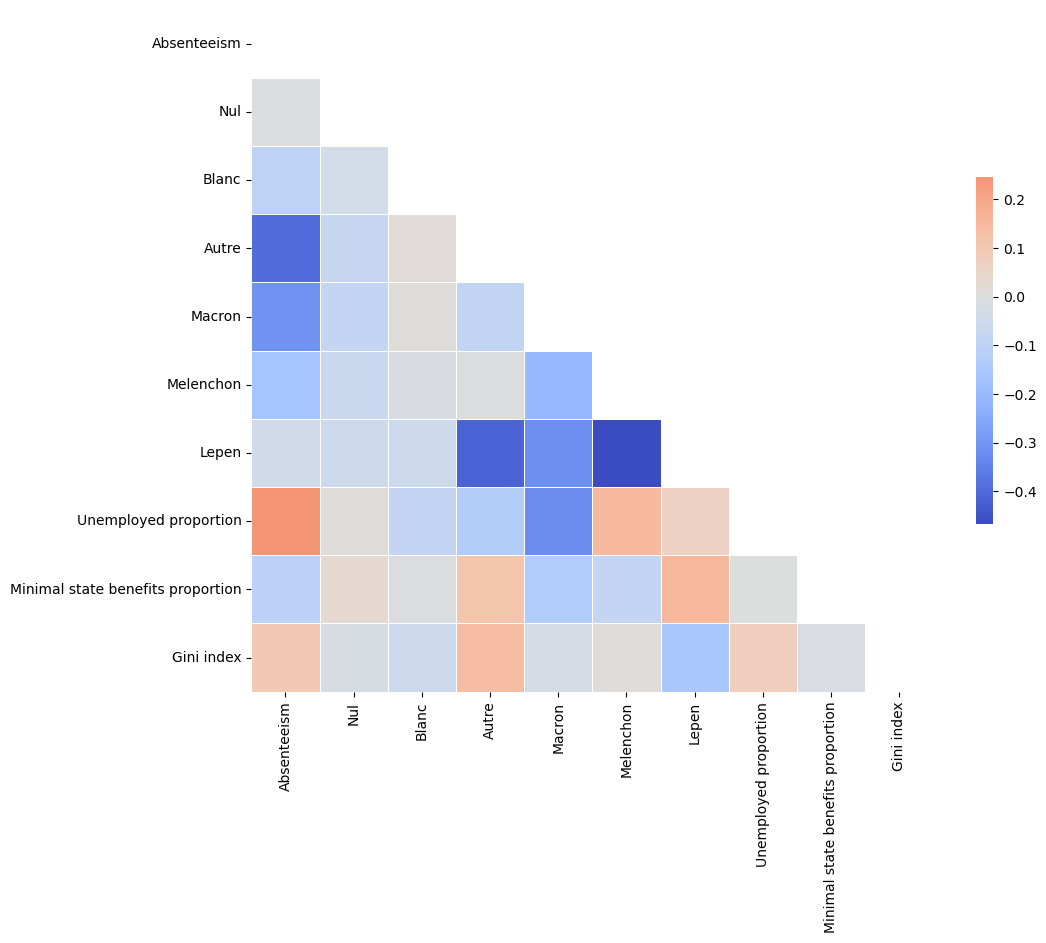

In [172]:
#### Seaborn heatmap correlation
x_axis_labels = ["Absenteeism","Nul","Blanc","Autre","Macron","Melenchon","Lepen","Unemployed proportion",'Minimal state benefits proportion','Gini index']
y_axis_labels = x_axis_labels.copy()

# create seaborn heatmap with required labels
correlation_unemployement = df_poverty.drop(columns=["latitude", "longitude"]).corr()
# sns.heatmap(correlation_unemployement, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linecolor='white', linewidths=0.1,cmap='coolwarm')
mask = np.triu(np.ones_like(correlation_unemployement, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_unemployement, mask=mask, cmap="coolwarm", center=0, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linecolor='white',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
correlation_unemployement

One can notice some very interesting elements such as :
- A positive correlation between the Gini index and Absenteeism and a vote for other candidates
- A negative correlation between unemployement and M. Macron's results
- A positive correlation between Minimal state benefits population and Mme Le Pen's scores
- A positive correlation between unemployement and M. Melenchon's scores
<br>
These elements tend to confirm some intuitions that people following french politics might have naturally drawn.

## Designing a submission

### Mandatory structure of a submission

A submission (should be stored in ./subsmissions/submission_foldername/) must contain a file named: estimator.py <br>

This file must contains a function: get_estimator() which return a model with:

- a fit(X, y) method
- a predict(X) method

We have already performed all data manipulations described above. In order to use the data after this preprocessing, use `get_test_data` and `get_train_data` functions. <br>

As an example, we design here the baseline method to solve the challenge.

In [173]:
import pandas as pd
import os
import numpy as np
from math import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error as mse
from math import *

X_train, y_train = get_train_data()
X_test, y_test = get_test_data()

def _removing_columns(X, columns):
    X = X.copy()
    X = X.drop(columns=columns)
    return X

class FeatureExtractor(BaseEstimator):
    def fit(self, X, y):
        return self

    def transform(self, X):
        X = _removing_columns(X, ['CODGEO'])
        return X.fillna(0)

def get_estimator():
    pip = Pipeline([
            ("FeatureExtractor",FeatureExtractor()),
            ("Preprocessor", StandardScaler()),
            ("Regressor", MultiOutputRegressor(Ridge(random_state=57)))
        ])
    return pip

pip = get_estimator()
pip.fit(X_train, y_train)

y_pred = pip.predict(X_test)
rmse = sqrt(mse(y_pred, y_test))

print("The root mean squared error on the test set with the baseline is: ", round(rmse, 2), "%")

The root mean squared error on the test set with the baseline is:  3.6 %


In [175]:
from submissions.starting_kit.estimator import *

pipe = get_estimator()

In [176]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('adding_location_data',
                 FunctionTransformer(func=<function add_location_data at 0x000001CBFAB47670>)),
                ('adding_insee_data',
                 FunctionTransformer(func=<function add_external_data at 0x000001CBFAB478B0>)),
                ('remove_codgeo',
                 FunctionTransformer(func=<function removing_codgeo at 0x000001CBFAB47EE0>)),
                ('preprocessor', StandardScaler()),
                ('regressor',
                 MultiOutputRegressor(estimator=Ridge(random_state=57)))])

In [177]:
y_pred = pipe.predict(X_test)

rmse = sqrt(mse(y_pred, y_test))

print("The root mean squared error on the test set with the baseline with features is: ", round(rmse, 2), "%")

The root mean squared error on the test set with the baseline with features is:  3.39 %


Our pipeline got slightly better results than the minimal values : it seems that 2022 strongly followed the same logics. Yet, we were able to increase our performances, and with better models the score should do nothing but lower.

## Quick submission test

You can test any submission locally by running:

In [178]:
! ramp-test --submission starting_kit

Testing French Presidential Elections
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions\starting_kit ...
CV fold 0
	score   rmse    mae  mixed      time
	train  3.423  2.196  2.810  6.148184
	valid  3.283  2.137  2.710  5.517724
	test   3.390  2.197  2.794  5.428284
CV fold 1
	score   rmse    mae  mixed      time
	train  3.412  2.191  2.802  5.471900
	valid  3.364  2.172  2.768  5.678884
	test   3.390  2.198  2.794  5.433963
CV fold 2
	score   rmse    mae  mixed      time
	train  3.411  2.189  2.800  5.787515
	valid  3.368  2.186  2.777  6.485001
	test   3.390  2.197  2.793  4.679885
CV fold 3
	score   rmse    mae  mixed      time
	train  3.396  2.186  2.791  4.812770
	valid  3.470  2.205  2.838  4.844707
	test   3.390  2.197  2.793  5.200987
CV fold 4
	score   rmse    mae  mixed       time
	train  3.385  2.182  2.784   7.322016
	valid  3.547  2.224  2.885   6.147759
	test   3.389  2.196  2.792  12.097526
CV fold 5
	score   rmse    mae  mixed       time


If you want to quickly test the that there are no obvious code errors, use the --quick-test flag to only use a small subset of the data.

In [139]:
! ramp-test --submission starting_kit --quick-test

Testing French Presidential Elections
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions\starting_kit ...
CV fold 0
	score   rmse    mae  mixed      time
	train  3.423  2.196  2.810  7.291856
	valid  3.283  2.137  2.710  7.857274
	test   3.390  2.197  2.794  5.224486
CV fold 1
	score   rmse    mae  mixed      time
	train  3.412  2.191  2.802  6.125061
	valid  3.364  2.172  2.768  4.656978
	test   3.390  2.198  2.794  5.461671
CV fold 2
	score   rmse    mae  mixed      time
	train  3.411  2.189  2.800  5.017316
	valid  3.368  2.186  2.777  4.401252
	test   3.390  2.197  2.793  4.126464
CV fold 3
	score   rmse    mae  mixed      time
	train  3.396  2.186  2.791  4.276161
	valid  3.470  2.205  2.838  4.176529
	test   3.390  2.197  2.793  4.461799
CV fold 4
	score   rmse    mae  mixed      time
	train  3.385  2.182  2.784  6.394689
	valid  3.547  2.224  2.885  5.921053
	test   3.389  2.196  2.792  5.024905
CV fold 5
	score   rmse    mae  mixed      time
	trai